In [1]:
################################################################################
# perform network analysis for bipartite network AD-gene using NetworkX

# author: Ximena Fernandez
# mail: xfdzciencias@gmail.com

################################################################################

In [2]:
################################################################################
# import modules 
################################################################################

import pandas as pd
import networkx as nx
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

In [3]:
################################################################################
# data extraction and network construction
################################################################################

In [4]:
## read network construction file 
df = pd.read_csv('./data/LINCS_ad_gene_nw_modified_with_symbols.csv')
display(df)

,gene,ad,value
0,SERPINE1,alaproclate,1
1,HSPD1,alaproclate,1
2,PAK6,alaproclate,1
3,EGR1,alaproclate,1
4,TLR4,alaproclate,1
...,...,...,...
6939,MARK1,venlafaxine,-1
6940,BAIAP2L2,venlafaxine,-1
6941,NPL,venlafaxine,-1
6942,OAZ3,venlafaxine,-1


In [5]:
## create complete graph (all nodes and edges)
B_complete = nx.Graph()

## create the list of the set of nodes from the edge-list
ads = set(df['ad'])
genes = set(df['gene'])

## add top and bottom nodes
B_complete.add_nodes_from(ads, bipartite=0)
B_complete.add_nodes_from(genes, bipartite=1)

## add edges with corresponding weight from df
for _, row in df.iterrows():
    B_complete.add_edge(row['ad'], row['gene'], weight=row['value'])

print(B_complete)

Graph with 5049 nodes and 6944 edges


In [6]:
##create partial graph (nodes with degree > 1)

B_partial = B_complete.copy()

## find nodes with degree = 1 and remove
nodes_to_remove = [node for node in B_partial.nodes() if B_partial.degree(node) == 1]
B_partial.remove_nodes_from(nodes_to_remove)

print(B_partial)

Graph with 1459 nodes and 3354 edges


In [7]:
################################################################################
# complete network analysis
################################################################################

In [8]:
################################################################################
# large scale features
################################################################################

In [9]:
## count the total number of edges
total_edges = B_complete.number_of_edges()

## get the sets of nodes for each bipartite class
top_nodes, bottom_nodes = nx.bipartite.sets(B_complete)

## count upregulated and downregulated edges
edge_weights = Counter(d['weight'] for _, _, d in B_complete.edges(data=True))

print(f"Total number of edges: {total_edges}")
print(f"Total upregulated edges: {edge_weights.get(1, 0)}")
print(f"Total downregulated edges: {edge_weights.get(-1, 0)}")
print(f"Total number of ADs: {len(top_nodes)}")
print(f"Total number of genes: {len(bottom_nodes)}")

Total number of edges: 6944
Total upregulated edges: 3472
Total downregulated edges: 3472
Total number of ADs: 28
Total number of genes: 5021


In [10]:
## calculate bipartite network density
density = nx.bipartite.density(B_complete, bottom_nodes)

print(f"Network density: {density:.4f}")

Network density: 0.0494


In [11]:
## check connectedness
connect = nx.is_connected(B_complete)
print(f"Connectedness: {connect}")

## find giant component
largest_cc = max(nx.connected_components(B_complete), key=len)
print(f"Giant component: {len(largest_cc)}")

Connectedness: True
Giant component: 5049


In [12]:
## compute degree sequences for both sets in the bipartite network
ads_degrees, genes_degrees = nx.bipartite.degrees(B_complete, bottom_nodes)  # nodes as keys, degrees as values

## extract degree sequences
ads_degree_list = list(dict(ads_degrees).values()) 
genes_degree_list = list(dict(genes_degrees).values()) 

## compute normal degree distributions 
ads_degree_dist = OrderedDict(sorted(Counter(ads_degree_list).items()))
genes_degree_dist = OrderedDict(sorted(Counter(genes_degree_list).items()))

## compute cumulative degree distributions (CDF)
ads_degree_values = np.array(list(ads_degree_dist.keys()))  
genes_degree_values = np.array(list(genes_degree_dist.keys()))

ads_cdf = 1 - np.cumsum(list(ads_degree_dist.values())) / len(ads_degree_list)
genes_cdf = 1 - np.cumsum(list(genes_degree_dist.values())) / len(genes_degree_list)

## compute average degree for ADs
avg_degree_ads = np.mean(ads_degree_list) if ads_degree_list else 0

## compute average degree for Genes
avg_degree_genes = np.mean(genes_degree_list) if genes_degree_list else 0

## print results
print(f"Average degree of ADs: {avg_degree_ads:.3f}")
print(f"Average degree of genes: {avg_degree_genes:.3f}")

Average degree of ADs: 248.000
Average degree of genes: 1.383


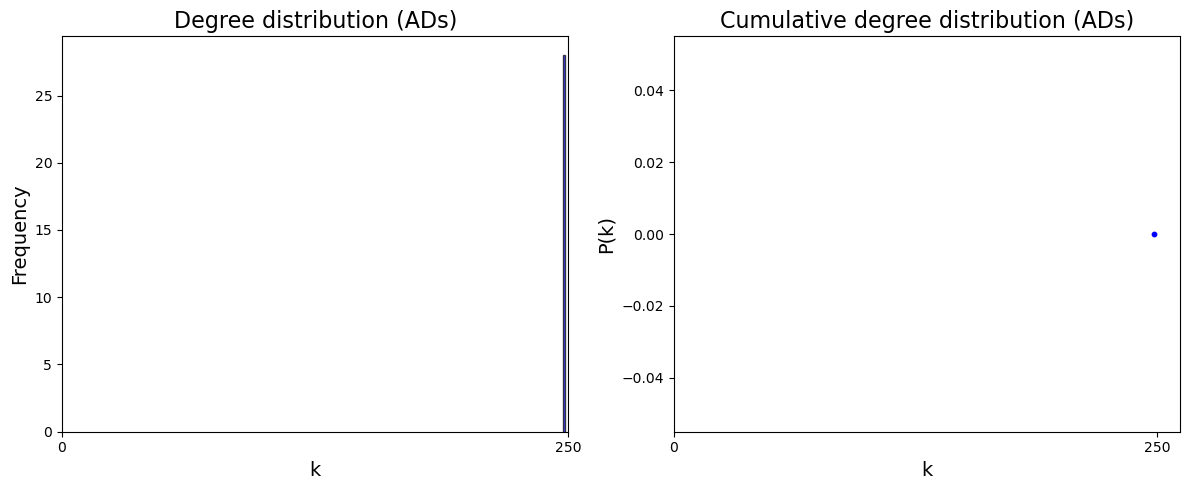

In [13]:
## plot normal degree distribution and CDF for antidepressants

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal degree distribution (histogram)
ax[0].hist(ads_degree_list, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("k", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Degree distribution (ADs)", fontsize=16)
ax[0].set_xticks(np.arange(0, max(ads_degree_list) + 250, 250))

## plot cumulative degree distribution (CDF)
ax[1].scatter(ads_degree_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_degree_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("k", fontsize=14)
ax[1].set_ylabel("P(k)", fontsize=14)
ax[1].set_title("Cumulative degree distribution (ADs)", fontsize=16)
ax[1].set_xticks(np.arange(0, max(ads_degree_values) + 250, 250))

## adjust layout and show plot
plt.tight_layout()
plt.show()

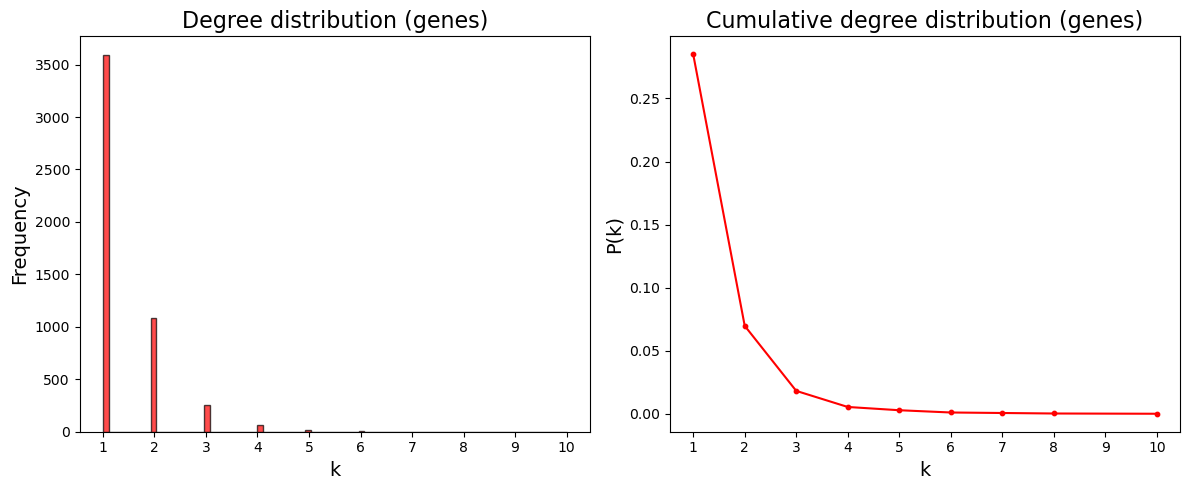

In [14]:
## plot normal degree distribution and CDF for genes

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal degree distribution (histogram)
ax[0].hist(genes_degree_list, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("k", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Degree distribution (genes)", fontsize=16)
ax[0].set_xticks(np.arange(1, max(genes_degree_list) + 1, 1))

## plot cumulative degree distribution (CDF)
ax[1].scatter(genes_degree_values, genes_cdf, color="red", s=10)
ax[1].plot(genes_degree_values, genes_cdf, linestyle="-", color="red")
ax[1].set_xlabel("k", fontsize=14)
ax[1].set_ylabel("P(k)", fontsize=14)
ax[1].set_title("Cumulative degree distribution (genes)", fontsize=16)
ax[1].set_xticks(np.arange(1, max(genes_degree_values) + 1, 1)) 

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [15]:
################################################################################
# network local scale features
################################################################################

In [16]:
## compute bipartite clustering coefficient for all nodes
clustering_coeffs = nx.bipartite.clustering(B_complete)

## extract clustering coefficients for ADs and Genes
ads_clustering = [clustering_coeffs[n] for n in top_nodes]
genes_clustering = [clustering_coeffs[n] for n in bottom_nodes]

## compute average clustering coefficient for each class
avg_clustering = {"ADs": np.mean(ads_clustering), "Genes": np.mean(genes_clustering)}

## print results
print(f"Average clustering coefficient of ADs: {avg_clustering['ADs']:.4f}")
print(f"Average clustering coefficient of genes: {avg_clustering['Genes']:.4f}")

## compute clustering coefficient distributions
ads_clustering_dist = Counter(ads_clustering)  
genes_clustering_dist = Counter(genes_clustering)

## compute cumulative distributions
ads_clustering_values = np.array(sorted(ads_clustering_dist.keys()))
genes_clustering_values = np.array(sorted(genes_clustering_dist.keys()))
ads_cdf = np.cumsum(list(ads_clustering_dist.values())) / len(ads_clustering)
genes_cdf = np.cumsum(list(genes_clustering_dist.values())) / len(genes_clustering)

Average clustering coefficient of ADs: 0.0145
Average clustering coefficient of genes: 0.6259


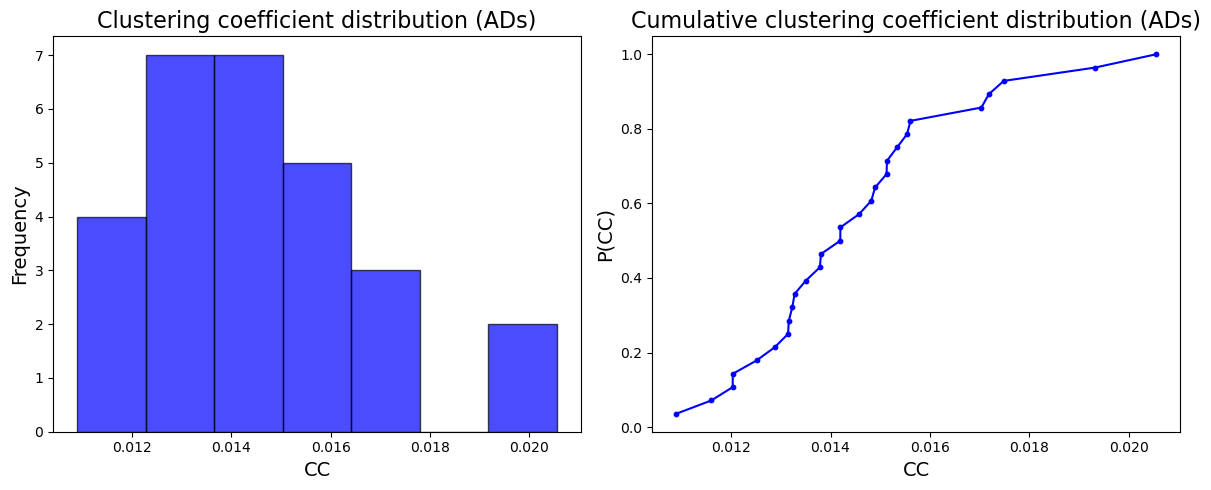

In [17]:
## plot normal clustering coefficient distribution and CDF for ADs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal clustering coefficient distribution (histogram)
ax[0].hist(ads_clustering, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("CC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Clustering coefficient distribution (ADs)", fontsize=16)

## plot cumulative clustering coefficient distribution (CDF)
ax[1].scatter(ads_clustering_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_clustering_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("CC", fontsize=14)
ax[1].set_ylabel("P(CC)", fontsize=14)
ax[1].set_title("Cumulative clustering coefficient distribution (ADs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

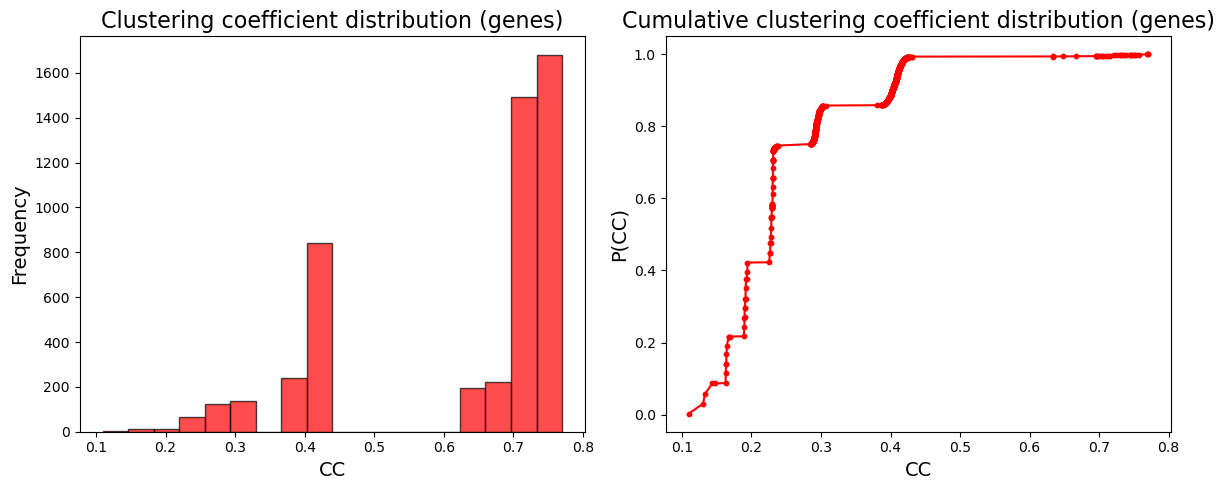

In [18]:
## plot normal clustering coefficient distribution and CDF for Genes

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal clustering coefficient distribution (histogram)
ax[0].hist(genes_clustering, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("CC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Clustering coefficient distribution (genes)", fontsize=16)

## plot cumulative clustering coefficient distribution (CDF)
ax[1].scatter(genes_clustering_values, genes_cdf, color="red", s=10)  # smaller markers
ax[1].plot(genes_clustering_values, genes_cdf, linestyle="-", color="red")
ax[1].set_xlabel("CC", fontsize=14)
ax[1].set_ylabel("P(CC)", fontsize=14)
ax[1].set_title("Cumulative clustering coefficient distribution (genes)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [19]:
## compute bipartite redundancy coefficient for all nodes
redundancy_coeffs = {}

for node in B_complete.nodes():
    if len(B_complete[node]) < 2:  # if the node has fewer than 2 neighbors
        redundancy_coeffs[node] = 0  # if the node has no neighbors, then RC = 0
    else:
        redundancy_coeffs[node] = nx.bipartite.node_redundancy(B_complete, nodes=[node])[node]

## extract redundancy coefficients for ADs and Genes
ads_redundancy = [redundancy_coeffs[n] for n in top_nodes]
genes_redundancy = [redundancy_coeffs[n] for n in bottom_nodes]

## compute average redundancy coefficient for each class
avg_redundancy = {"ADs": np.mean(ads_redundancy), "Genes": np.mean(genes_redundancy)}

## print results
print(f"Average redundancy coefficient of ADs: {avg_redundancy['ADs']:.4f}")
print(f"Average redundancy coefficient of genes: {avg_redundancy['Genes']:.4f}")

## compute redundancy coefficient distributions
ads_redundancy_dist = Counter(ads_redundancy)  
genes_redundancy_dist = Counter(genes_redundancy)

## compute cumulative distributions
ads_redundancy_values = np.array(sorted(ads_redundancy_dist.keys()))
genes_redundancy_values = np.array(sorted(genes_redundancy_dist.keys()))
ads_cdf = np.cumsum(list(ads_redundancy_dist.values())) / len(ads_redundancy)
genes_cdf = np.cumsum(list(genes_redundancy_dist.values())) / len(genes_redundancy)

Average redundancy coefficient of ADs: 0.0229
Average redundancy coefficient of genes: 0.2850


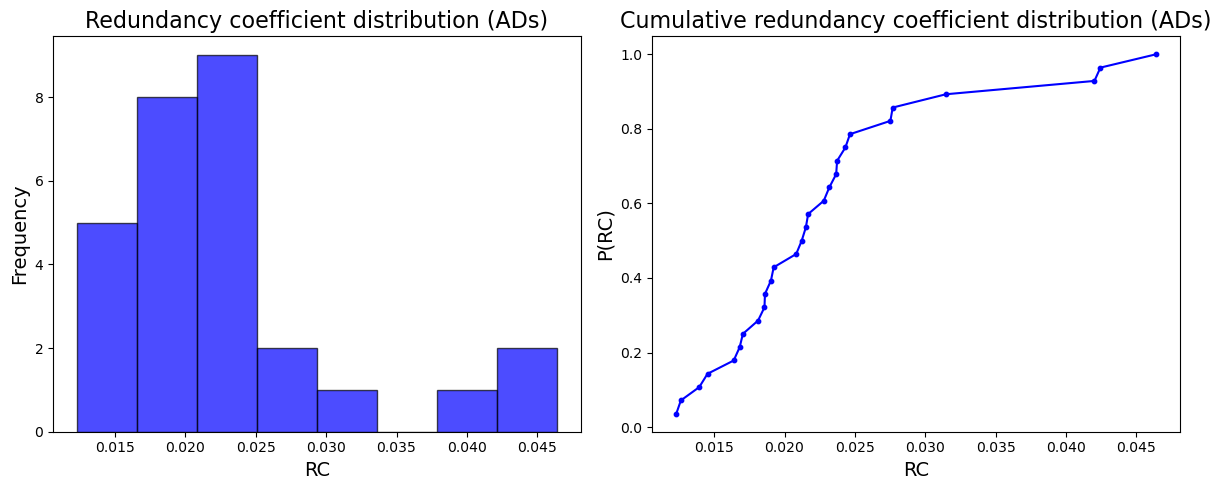

In [20]:
## plot normal redundancy coefficient distribution and CDF for ADs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal redundancy coefficient distribution (histogram)
ax[0].hist(ads_redundancy, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("RC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Redundancy coefficient distribution (ADs)", fontsize=16)

## plot cumulative redundancy coefficient distribution (CDF)
ax[1].scatter(ads_redundancy_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_redundancy_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("RC", fontsize=14)
ax[1].set_ylabel("P(RC)", fontsize=14)
ax[1].set_title("Cumulative redundancy coefficient distribution (ADs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

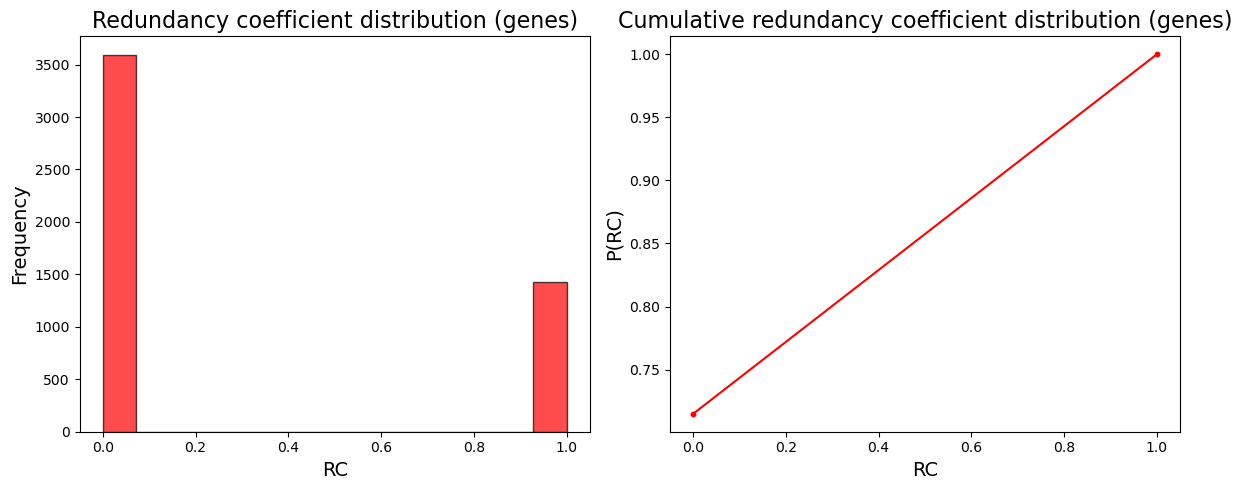

In [21]:
## plot normal redundancy coefficient distribution and CDF for Genes

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal redundancy coefficient distribution (histogram)
ax[0].hist(genes_redundancy, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("RC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Redundancy coefficient distribution (genes)", fontsize=16)

## plot cumulative redundancy coefficient distribution (CDF)
ax[1].scatter(genes_redundancy_values, genes_cdf, color="red", s=10)  # smaller markers
ax[1].plot(genes_redundancy_values, genes_cdf, linestyle="-", color="red")
ax[1].set_xlabel("RC", fontsize=14)
ax[1].set_ylabel("P(RC)", fontsize=14)
ax[1].set_title("Cumulative redundancy coefficient distribution (genes)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [22]:
################################################################################
# network centrality measures
################################################################################

In [23]:
## compute bipartite centralities separately for each class
ads_degree_centrality = nx.bipartite.degree_centrality(B_complete, top_nodes)
genes_degree_centrality = nx.bipartite.degree_centrality(B_complete, bottom_nodes)

ads_closeness_centrality = nx.bipartite.closeness_centrality(B_complete, nodes=top_nodes)
genes_closeness_centrality = nx.bipartite.closeness_centrality(B_complete, nodes=bottom_nodes)

ads_betweenness_centrality = nx.bipartite.betweenness_centrality(B_complete, top_nodes)
genes_betweenness_centrality = nx.bipartite.betweenness_centrality(B_complete, bottom_nodes)

## compute average centrality for each class directly from the dict values
avg_centrality_ads = {"degree": np.mean(list(ads_degree_centrality.values())), "closeness": np.mean(list(ads_closeness_centrality.values())), "betweenness": np.mean(list(ads_betweenness_centrality.values()))}

avg_centrality_genes = {"degree": np.mean(list(genes_degree_centrality.values())), "closeness": np.mean(list(genes_closeness_centrality.values())), "betweenness": np.mean(list(genes_betweenness_centrality.values()))}

## print results
print(f"Average degree centrality of ADs: {avg_centrality_ads['degree']:.4f}")
print(f"Average closeness centrality of ADs: {avg_centrality_ads['closeness']:.4f}")
print(f"Average betweenness centrality of ADs: {avg_centrality_ads['betweenness']:.4f}")

print(f"Average degree centrality of genes: {avg_centrality_genes['degree']:.4f}")
print(f"Average closeness centrality of genes: {avg_centrality_genes['closeness']:.4f}")
print(f"Average betweenness centrality of genes: {avg_centrality_genes['betweenness']:.4f}")

Average degree centrality of ADs: 0.0494
Average closeness centrality of ADs: 0.5144
Average betweenness centrality of ADs: 0.0006
Average degree centrality of genes: 0.0494
Average closeness centrality of genes: 0.5144
Average betweenness centrality of genes: 0.0006


In [24]:
################################################################################
# partial network analysis
################################################################################

In [25]:
################################################################################
# large scale features
################################################################################

In [26]:
## count the total number of edges
total_edges = B_partial.number_of_edges()

## get the sets of nodes for each bipartite class
top_nodes, bottom_nodes = nx.bipartite.sets(B_partial)

## count upregulated and downregulated edges
edge_weights = Counter(d['weight'] for _, _, d in B_partial.edges(data=True))

print(f"Total number of edges: {total_edges}")
print(f"Total upregulated edges: {edge_weights.get(1, 0)}")
print(f"Total downregulated edges: {edge_weights.get(-1, 0)}")
print(f"Total number of ADs: {len(top_nodes)}")
print(f"Total number of genes: {len(bottom_nodes)}")

Total number of edges: 3354
Total upregulated edges: 1728
Total downregulated edges: 1626
Total number of ADs: 28
Total number of genes: 1431


In [27]:
## calculate bipartite network density
density = nx.bipartite.density(B_partial, bottom_nodes)

print(f"Network density: {density:.4f}")

Network density: 0.0837


In [28]:
## check connectedness
connect = nx.is_connected(B_partial)
print(f"Connectedness: {connect}")

## find giant component
largest_cc = max(nx.connected_components(B_partial), key=len)
print(f"Giant component: {len(largest_cc)}")

Connectedness: True
Giant component: 1459


In [29]:
## compute degree sequences for both sets in the bipartite network
ads_degrees, genes_degrees = nx.bipartite.degrees(B_partial, bottom_nodes)  # nodes as keys, degrees as values

## extract degree sequences
ads_degree_list = list(dict(ads_degrees).values()) 
genes_degree_list = list(dict(genes_degrees).values()) 

## compute normal degree distributions 
ads_degree_dist = OrderedDict(sorted(Counter(ads_degree_list).items()))
genes_degree_dist = OrderedDict(sorted(Counter(genes_degree_list).items()))

## compute cumulative degree distributions (CDF)
ads_degree_values = np.array(list(ads_degree_dist.keys()))  
genes_degree_values = np.array(list(genes_degree_dist.keys()))

ads_cdf = 1 - np.cumsum(list(ads_degree_dist.values())) / len(ads_degree_list)
genes_cdf = 1 - np.cumsum(list(genes_degree_dist.values())) / len(genes_degree_list)

## compute average degree for ADs
avg_degree_ads = np.mean(ads_degree_list) if ads_degree_list else 0

## compute average degree for Genes
avg_degree_genes = np.mean(genes_degree_list) if genes_degree_list else 0

## print results
print(f"Average degree of ADs: {avg_degree_ads:.3f}")
print(f"Average degree of genes: {avg_degree_genes:.3f}")

Average degree of ADs: 119.786
Average degree of genes: 2.344


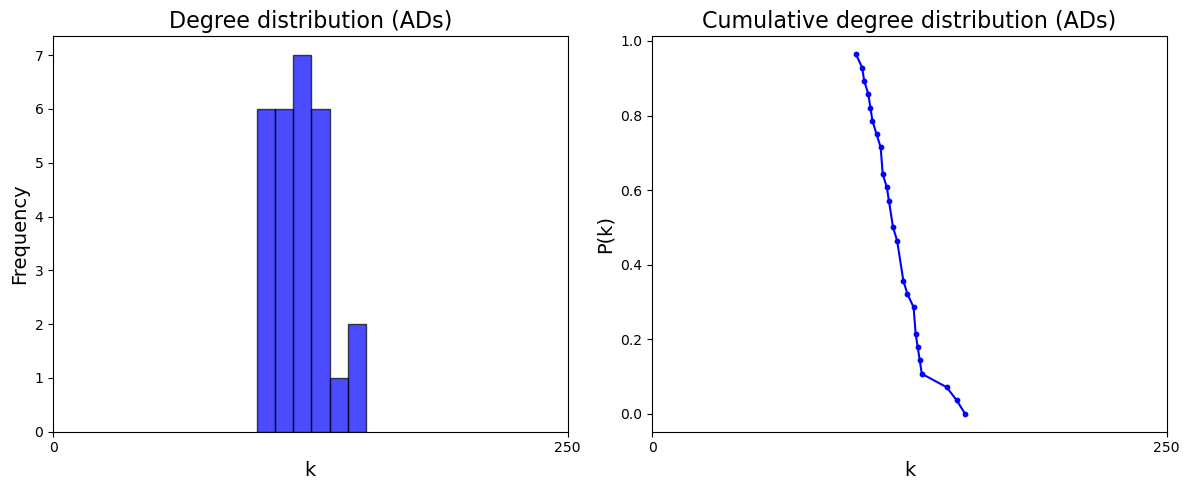

In [30]:
## plot normal degree distribution and CDF for antidepressants

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal degree distribution (histogram)
ax[0].hist(ads_degree_list, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("k", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Degree distribution (ADs)", fontsize=16)
ax[0].set_xticks(np.arange(0, max(ads_degree_list) + 250, 250))

## plot cumulative degree distribution (CDF)
ax[1].scatter(ads_degree_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_degree_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("k", fontsize=14)
ax[1].set_ylabel("P(k)", fontsize=14)
ax[1].set_title("Cumulative degree distribution (ADs)", fontsize=16)
ax[1].set_xticks(np.arange(0, max(ads_degree_values) + 250, 250))

## adjust layout and show plot
plt.tight_layout()
plt.show()

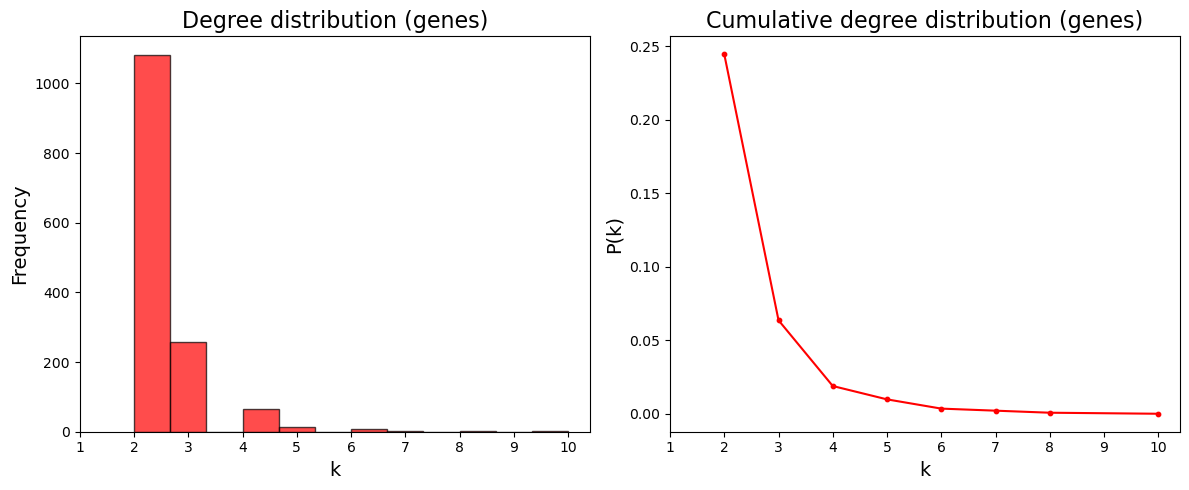

In [31]:
## plot normal degree distribution and CDF for genes

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal degree distribution (histogram)
ax[0].hist(genes_degree_list, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("k", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Degree distribution (genes)", fontsize=16)
ax[0].set_xticks(np.arange(1, max(genes_degree_list) + 1, 1))

## plot cumulative degree distribution (CDF)
ax[1].scatter(genes_degree_values, genes_cdf, color="red", s=10)
ax[1].plot(genes_degree_values, genes_cdf, linestyle="-", color="red")
ax[1].set_xlabel("k", fontsize=14)
ax[1].set_ylabel("P(k)", fontsize=14)
ax[1].set_title("Cumulative degree distribution (genes)", fontsize=16)
ax[1].set_xticks(np.arange(1, max(genes_degree_values) + 1, 1)) 

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [32]:
################################################################################
# network local scale features
################################################################################

In [33]:
## compute bipartite clustering coefficient for all nodes
clustering_coeffs = nx.bipartite.clustering(B_partial)

## extract clustering coefficients for ADs and Genes
ads_clustering = [clustering_coeffs[n] for n in top_nodes]
genes_clustering = [clustering_coeffs[n] for n in bottom_nodes]

## compute average clustering coefficient for each class
avg_clustering = {"ADs": np.mean(ads_clustering), "Genes": np.mean(genes_clustering)}

## print results
print(f"Average clustering coefficient of ADs: {avg_clustering['ADs']:.4f}")
print(f"Average clustering coefficient of genes: {avg_clustering['Genes']:.4f}")

## compute clustering coefficient distributions
ads_clustering_dist = Counter(ads_clustering)  
genes_clustering_dist = Counter(genes_clustering)

## compute cumulative distributions
ads_clustering_values = np.array(sorted(ads_clustering_dist.keys()))
genes_clustering_values = np.array(sorted(genes_clustering_dist.keys()))
ads_cdf = np.cumsum(list(ads_clustering_dist.values())) / len(ads_clustering)
genes_cdf = np.cumsum(list(genes_clustering_dist.values())) / len(genes_clustering)

Average clustering coefficient of ADs: 0.0304
Average clustering coefficient of genes: 0.2927


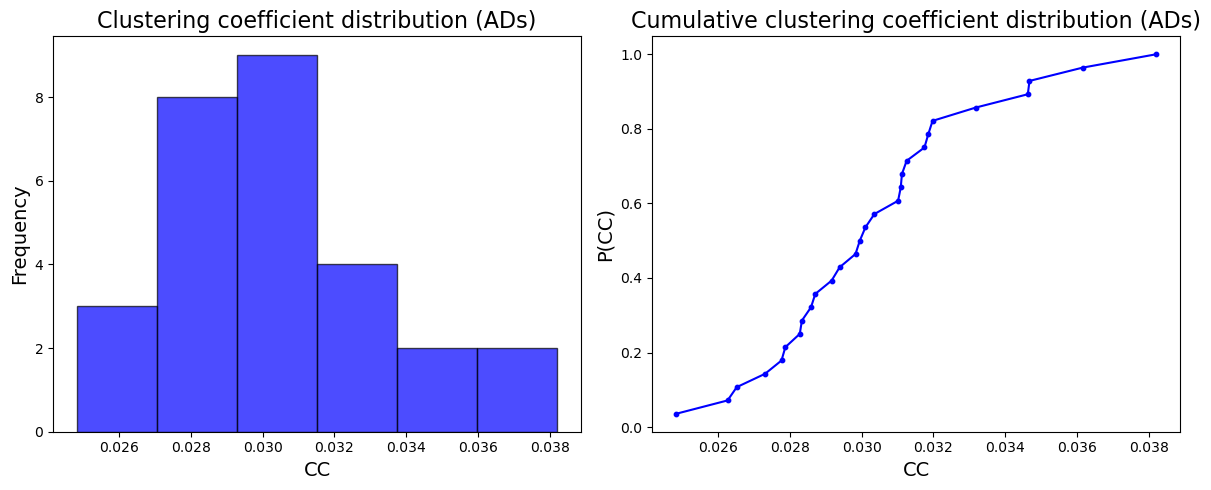

In [34]:
## plot normal clustering coefficient distribution and CDF for ADs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal clustering coefficient distribution (histogram)
ax[0].hist(ads_clustering, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("CC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Clustering coefficient distribution (ADs)", fontsize=16)

## plot cumulative clustering coefficient distribution (CDF)
ax[1].scatter(ads_clustering_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_clustering_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("CC", fontsize=14)
ax[1].set_ylabel("P(CC)", fontsize=14)
ax[1].set_title("Cumulative clustering coefficient distribution (ADs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

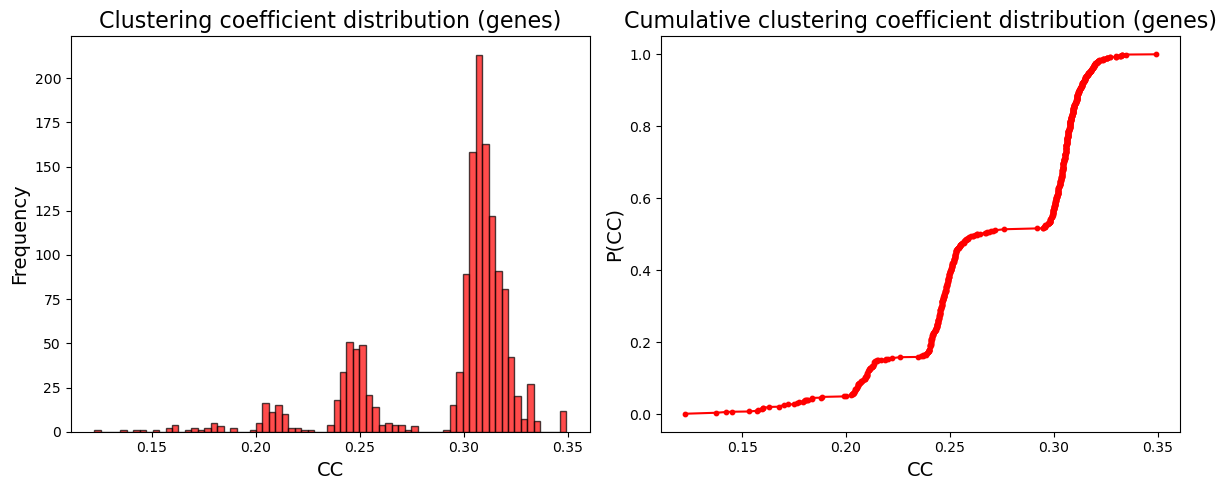

In [35]:
## plot normal clustering coefficient distribution and CDF for Genes

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal clustering coefficient distribution (histogram)
ax[0].hist(genes_clustering, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("CC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Clustering coefficient distribution (genes)", fontsize=16)

## plot cumulative clustering coefficient distribution (CDF)
ax[1].scatter(genes_clustering_values, genes_cdf, color="red", s=10)  # smaller markers
ax[1].plot(genes_clustering_values, genes_cdf, linestyle="-", color="red")
ax[1].set_xlabel("CC", fontsize=14)
ax[1].set_ylabel("P(CC)", fontsize=14)
ax[1].set_title("Cumulative clustering coefficient distribution (genes)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [36]:
## compute bipartite redundancy coefficient for all nodes
redundancy_coeffs = {}

for node in B_partial.nodes():
    if len(B_partial[node]) < 2:  # if the node has fewer than 2 neighbors
        redundancy_coeffs[node] = 0  # if the node has no neighbors, then RC = 0
    else:
        redundancy_coeffs[node] = nx.bipartite.node_redundancy(B_partial, nodes=[node])[node]

## extract redundancy coefficients for ADs and Genes
ads_redundancy = [redundancy_coeffs[n] for n in top_nodes]
genes_redundancy = [redundancy_coeffs[n] for n in bottom_nodes]

## compute average redundancy coefficient for each class
avg_redundancy = {"ADs": np.mean(ads_redundancy), "Genes": np.mean(genes_redundancy)}

## print results
print(f"Average redundancy coefficient of ADs: {avg_redundancy['ADs']:.4f}")
print(f"Average redundancy coefficient of genes: {avg_redundancy['Genes']:.4f}")

## compute redundancy coefficient distributions
ads_redundancy_dist = Counter(ads_redundancy)  
genes_redundancy_dist = Counter(genes_redundancy)

## compute cumulative distributions
ads_redundancy_values = np.array(sorted(ads_redundancy_dist.keys()))
genes_redundancy_values = np.array(sorted(genes_redundancy_dist.keys()))
ads_cdf = np.cumsum(list(ads_redundancy_dist.values())) / len(ads_redundancy)
genes_cdf = np.cumsum(list(genes_redundancy_dist.values())) / len(genes_redundancy)

Average redundancy coefficient of ADs: 0.0954
Average redundancy coefficient of genes: 1.0000


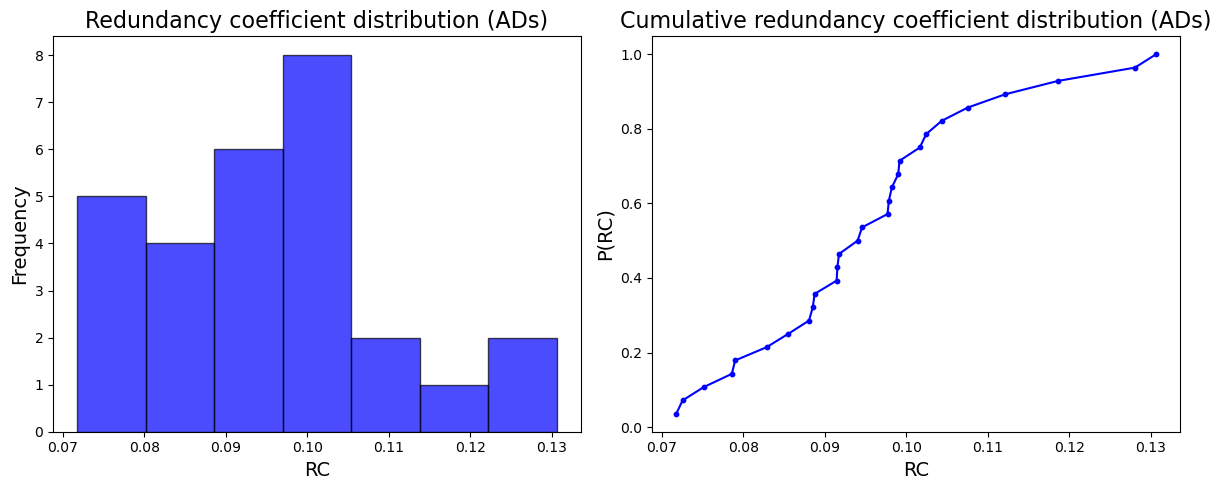

In [37]:
## plot normal redundancy coefficient distribution and CDF for ADs

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal redundancy coefficient distribution (histogram)
ax[0].hist(ads_redundancy, bins='auto', color="blue", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("RC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Redundancy coefficient distribution (ADs)", fontsize=16)

## plot cumulative redundancy coefficient distribution (CDF)
ax[1].scatter(ads_redundancy_values, ads_cdf, color="blue", s=10)  # smaller markers
ax[1].plot(ads_redundancy_values, ads_cdf, linestyle="-", color="blue")
ax[1].set_xlabel("RC", fontsize=14)
ax[1].set_ylabel("P(RC)", fontsize=14)
ax[1].set_title("Cumulative redundancy coefficient distribution (ADs)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

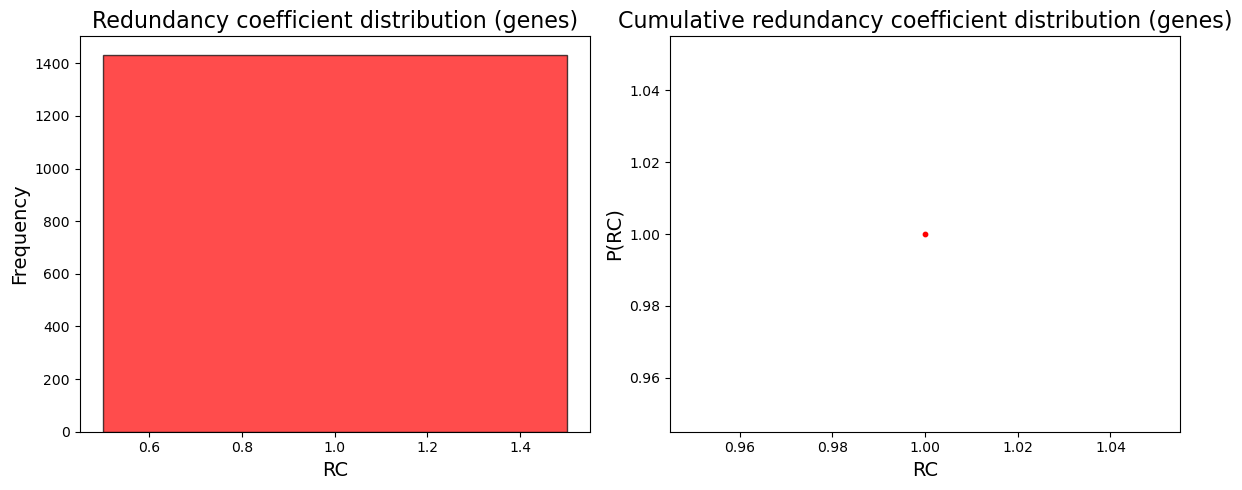

In [38]:
## plot normal redundancy coefficient distribution and CDF for Genes

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

## plot normal redundancy coefficient distribution (histogram)
ax[0].hist(genes_redundancy, bins='auto', color="red", alpha=0.7, edgecolor="black")
ax[0].set_xlabel("RC", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Redundancy coefficient distribution (genes)", fontsize=16)

## plot cumulative redundancy coefficient distribution (CDF)
ax[1].scatter(genes_redundancy_values, genes_cdf, color="red", s=10)  # smaller markers
ax[1].plot(genes_redundancy_values, genes_cdf, linestyle="-", color="red")
ax[1].set_xlabel("RC", fontsize=14)
ax[1].set_ylabel("P(RC)", fontsize=14)
ax[1].set_title("Cumulative redundancy coefficient distribution (genes)", fontsize=16)

## adjust layout and show plot
plt.tight_layout()
plt.show()

In [39]:
################################################################################
# network centrality measures
################################################################################

In [40]:
## compute bipartite centralities separately for each class
ads_degree_centrality = nx.bipartite.degree_centrality(B_partial, top_nodes)
genes_degree_centrality = nx.bipartite.degree_centrality(B_partial, bottom_nodes)

ads_closeness_centrality = nx.bipartite.closeness_centrality(B_partial, nodes=top_nodes)
genes_closeness_centrality = nx.bipartite.closeness_centrality(B_partial, nodes=bottom_nodes)

ads_betweenness_centrality = nx.bipartite.betweenness_centrality(B_partial, top_nodes)
genes_betweenness_centrality = nx.bipartite.betweenness_centrality(B_partial, bottom_nodes)

## compute average centrality for each class directly from the dict values
avg_centrality_ads = {"degree": np.mean(list(ads_degree_centrality.values())), "closeness": np.mean(list(ads_closeness_centrality.values())), "betweenness": np.mean(list(ads_betweenness_centrality.values()))}

avg_centrality_genes = {"degree": np.mean(list(genes_degree_centrality.values())), "closeness": np.mean(list(genes_closeness_centrality.values())), "betweenness": np.mean(list(genes_betweenness_centrality.values()))}

## print results
print(f"Average degree centrality of ADs: {avg_centrality_ads['degree']:.4f}")
print(f"Average closeness centrality of ADs: {avg_centrality_ads['closeness']:.4f}")
print(f"Average betweenness centrality of ADs: {avg_centrality_ads['betweenness']:.4f}")

print(f"Average degree centrality of genes: {avg_centrality_genes['degree']:.4f}")
print(f"Average closeness centrality of genes: {avg_centrality_genes['closeness']:.4f}")
print(f"Average betweenness centrality of genes: {avg_centrality_genes['betweenness']:.4f}")

Average degree centrality of ADs: 0.0837
Average closeness centrality of ADs: 0.5456
Average betweenness centrality of ADs: 0.0018
Average degree centrality of genes: 0.0837
Average closeness centrality of genes: 0.5456
Average betweenness centrality of genes: 0.0018
